___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [13]:
df = pd.read_csv('kyphosis.csv')

In [14]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [28]:
print("""
Introduction to the dataset:

This dataset contains details of patients who had undergone surgery for kyphosis, a spinal condition. 
Let's explore the dataset a bit more to understand it better.

Age: It is the age in months of the patient at the time of operation.

Number: It is the number of vertebrae involved in the operation.

Start: It is the number of the first or top most vertebrae that was operated on.

Kyphosis: It is a boolean variable. It tells whether the operation was successful in correcting the spinal condition or not.

Let‘s now get into the details of the dataset and see how it looks like.
""")


Introduction to the dataset:

This dataset contains details of patients who had undergone surgery for kyphosis, a spinal condition. 
Let's explore the dataset a bit more to understand it better.

Age: It is the age in months of the patient at the time of operation.

Number: It is the number of vertebrae involved in the operation.

Start: It is the number of the first or top most vertebrae that was operated on.

Kyphosis: It is a boolean variable. It tells whether the operation was successful in correcting the spinal condition or not.

Let‘s now get into the details of the dataset and see how it looks like.


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [30]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [35]:
df.corr(numeric_only=True)

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


## EDA

We'll just check out a simple pairplot for this small dataset.

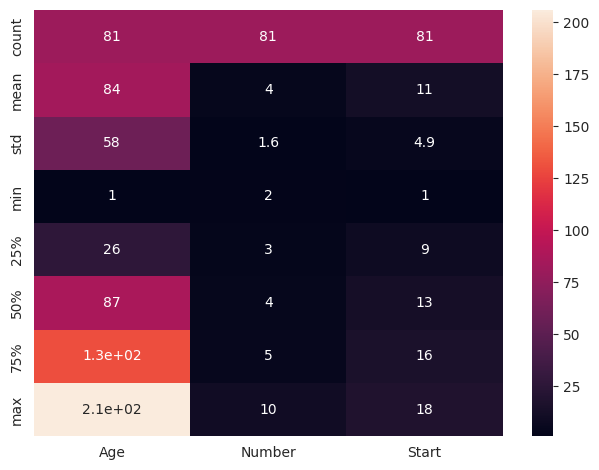

In [37]:
sns.heatmap(df.describe(),annot=True)
plt.tight_layout()

/tmp/ipykernel_20605/1840918767.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Kyphosis',data=df,palette='Set1')


[Text(0, 0, '64')]

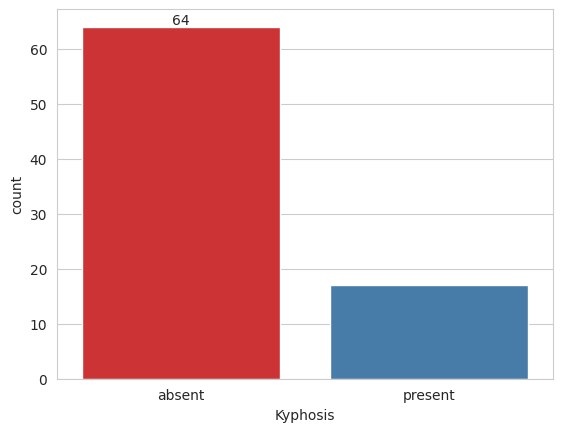

In [46]:
ax = sns.countplot(x='Kyphosis',data=df,palette='Set1')
ax.bar_label(ax.containers[0], label_type='edge')

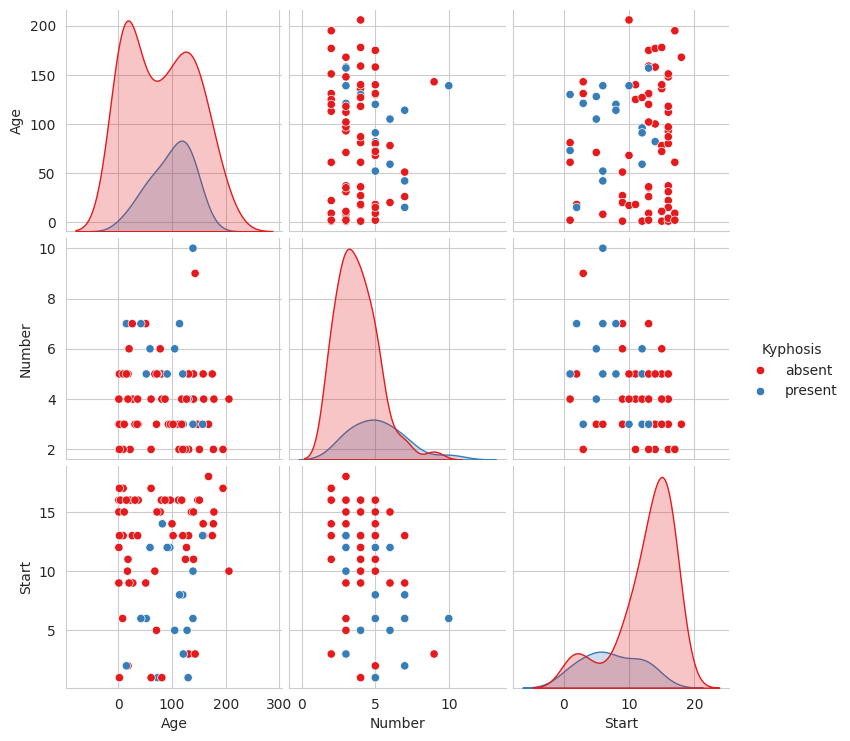

In [15]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.81      0.87        21
     present       0.43      0.75      0.55         4

    accuracy                           0.80        25
   macro avg       0.69      0.78      0.71        25
weighted avg       0.86      0.80      0.82        25


In [25]:
print(confusion_matrix(y_test,predictions))

[[17  4]
 [ 1  3]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))

# Great Job!